**Problema de regresión logística.**

En base al set de datos “titanic.csv” realizar las siguientes tareas que comprenden un proyecto de problema de clasificación con regresión logística:

Chequear si en la base existen datos nulos, en caso de que existan, considerar si es necesario reemplazar los nulos por un valor o desestimar la variable dependiendo de la cantidad de nulos en la misma.

Chequear por outliers, en caso de que los haya, excluirlos.

Realizar la transformación de las variables categóricas, para que sean categóricas numéricas o dummy.

Realizar análisis exploratorio de datos (EDA).

Separar en subconjuntos de entrenamiento y de prueba.

Entrenar el modelo de regresión logística.

Exponer los resultados del modelo.

Exponer el modelo final utilizado describiendo porque cree que es el mejor para la predicción del valor de futuras observaciones de la variable dependiente.


**Datos**

PassengerId: Un identificador único para cada pasajero.

Survived: Indica si el pasajero sobrevivió (1) o no (0).

Pclass: Clase del boleto del pasajero (1 = Primera, 2 = Segunda, 3 = Tercera).

Name: Nombre del pasajero.

Sex: Sexo del pasajero (male = masculino, female = femenino).

Age: Edad del pasajero en años. Puede contener valores nulos.

SibSp: Número de hermanos/esposos a bordo del Titanic.

Parch: Número de padres/hijos a bordo del Titanic.

Ticket: Número del boleto del pasajero.

Fare: Tarifa del pasajero.

Cabin: Número de cabina del pasajero. Puede contener valores nulos.

Embarked: Puerto de embarque del pasajero (C = Cherburgo, Q = Queenstown, S = Southampton).

# **CARGA DE BASE DE DATOS**

In [ ]:
# LIBRERIAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
titanic = pd.read_csv('/content/titanic_set.csv') #ccargamos la base en titanic

In [ ]:
# BUSCAMOS NULOS
nulls = df.isnull().sum()
nulls

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# vamos a desestimar la columna Cabin por su cantidad de nulos
titanic_sn = titanic.drop(columns=['Cabin','Ticket','Name'])    #Tambien sacamos ticket y Name porque no nos va a servir
#Usamos la media de edad para los nulos de su columna.
edad_prom = titanic_sn['Age'].mean()
titanic_sn['Age'].fillna(edad_prom, inplace=True)
#Usamos la moda de embarked para los nulos de su columna.
moda_embarked = df['Embarked'].mode()[0]
titanic_sn['Embarked'].fillna(moda_embarked, inplace=True)
titanic_sn

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


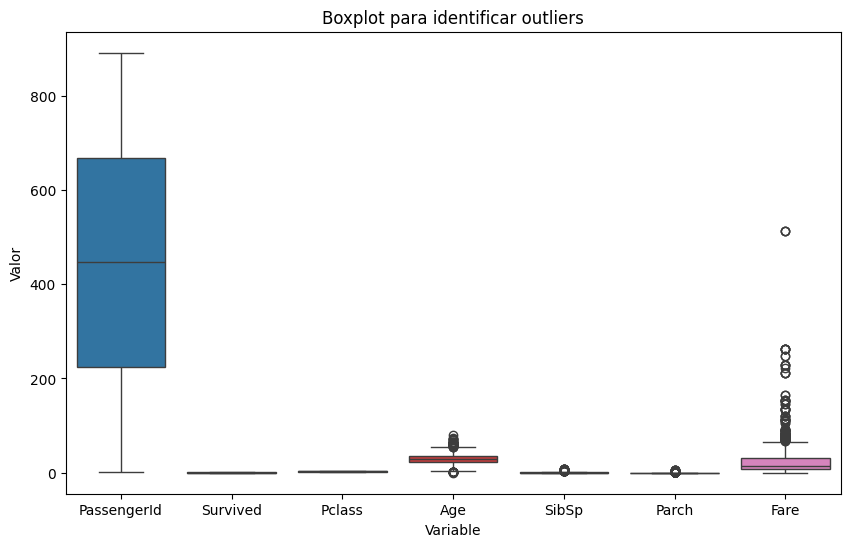

In [ ]:
#Chequeamos outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_sn)
plt.title("Boxplot para identificar outliers")
plt.xlabel("Variable")
plt.ylabel("Valor")
plt.show()

In [ ]:
# con esto vemos que hay outliers en edad, dibsp, parch y fare.
#calculamos los rangos para identificacion de outliers de las 4 columnas.
Q1_age = titanic_sn['Age'].quantile(0.25)
Q3_age = titanic_sn['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
outlier_inferior_age = Q1_age - 1.5 * IQR_age
outlier_superior_age = Q3_age + 1.5 * IQR_age

Q1_SibSp = titanic_sn['SibSp'].quantile(0.25)
Q3_SibSp = titanic_sn['SibSp'].quantile(0.75)
IQR_SibSp = Q3_SibSp - Q1_SibSp
outlier_inferior_SibSp = Q1_SibSp - 1.5 * IQR_SibSp
outlier_superior_SibSp = Q3_SibSp + 1.5 * IQR_SibSp

Q1_Parch = titanic_sn['Parch'].quantile(0.25)
Q3_Parch = titanic_sn['Parch'].quantile(0.75)
IQR_Parch = Q3_Parch - Q1_Parch
outlier_inferior_Parch = Q1_Parch - 1.5 * IQR_Parch
outlier_superior_Parch = Q3_Parch + 1.5 * IQR_Parch

Q1_Fare = titanic_sn['Fare'].quantile(0.25)
Q3_Fare = titanic_sn['Fare'].quantile(0.75)
IQR_Fare = Q3_Fare - Q1_Fare
outlier_inferior_Fare = Q1_Fare - 1.5 * IQR_Fare
outlier_superior_Fare = Q3_Fare + 1.5 * IQR_Fare

outliers_age = titanic_sn[(titanic_sn['Age'] < outlier_inferior_age) | (titanic_sn['Age'] > outlier_superior_age)]
outliers_SibSp = titanic_sn[(titanic_sn['SibSp'] < outlier_inferior_SibSp) | (titanic_sn['SibSp'] > outlier_superior_SibSp)]
outliers_Parch = titanic_sn[(titanic_sn['Parch'] < outlier_inferior_Parch) | (titanic_sn['Parch'] > outlier_superior_Parch)]
outliers_fare = titanic_sn[(titanic_sn['Fare'] < outlier_inferior_Fare) | (titanic_sn['Fare'] > outlier_superior_Fare)]

titanic_so = titanic_sn[~((titanic_sn['Age'] < outlier_inferior_age) | (titanic_sn['Age'] > outlier_superior_age) |
               (titanic_sn['SibSp'] < outlier_inferior_SibSp) | (titanic_sn['SibSp'] > outlier_superior_SibSp) |
#                (titanic_sn['Parch'] < outlier_inferior_Parch) | (titanic_sn['Parch'] > outlier_superior_Parch) |
                (titanic_sn['Fare'] < outlier_inferior_Fare) | (titanic_sn['Fare'] > outlier_superior_Fare))]

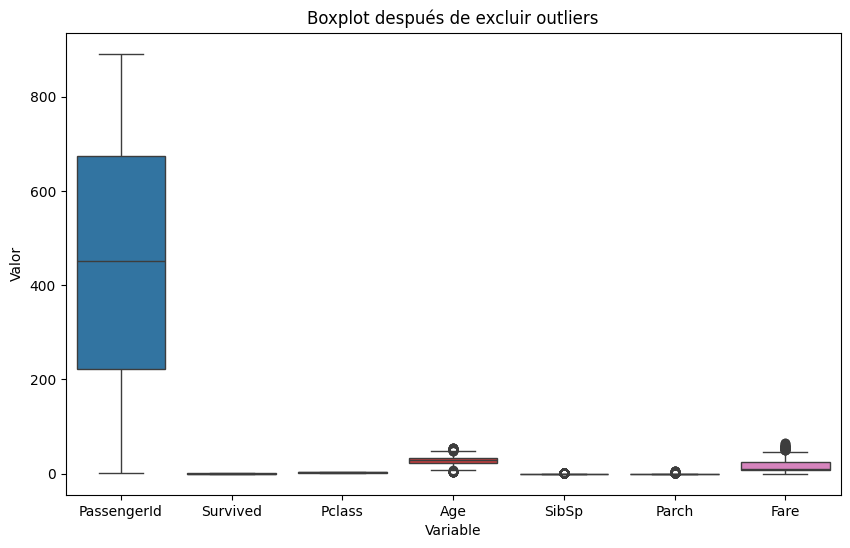

In [ ]:
# Verificar la distribución de las variables numéricas después de excluir outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_so)
plt.title("Boxplot después de excluir outliers")
plt.xlabel("Variable")
plt.ylabel("Valor")
plt.show()

In [ ]:
#Transformacion de variables categoricas (sexo)
titanic_so_c = titanic_so
titanic_so_c.loc[df['Sex'] == 'female', 'Sex'] = 0 # Con esto ponemos el valor de femenino en 0, y masculino en 1.
titanic_so_c.loc[df['Sex'] == 'male', 'Sex'] = 1   # Con esto ponemos el valor de femenino en 0, y masculino en 1.
titanic_so_c

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,S
2,3,1,3,0,26.000000,0,0,7.9250,S
3,4,1,1,0,35.000000,1,0,53.1000,S
4,5,0,3,1,35.000000,0,0,8.0500,S
5,6,0,3,1,29.699118,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,S
887,888,1,1,0,19.000000,0,0,30.0000,S
888,889,0,3,0,29.699118,1,2,23.4500,S
889,890,1,1,1,26.000000,0,0,30.0000,C


In [ ]:
#Transformacion de variables (embarked)
embarked_dummies = pd.get_dummies(titanic_so_c['Embarked'], prefix='Embarked', drop_first=False)
titanic_so_c = pd.concat([titanic_so_c, embarked_dummies], axis=1)
titanic_so_c.drop(columns=['Embarked'], inplace=True)
titanic_so_c

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.000000,1,0,7.2500,False,False,True
2,3,1,3,0,26.000000,0,0,7.9250,False,False,True
3,4,1,1,0,35.000000,1,0,53.1000,False,False,True
4,5,0,3,1,35.000000,0,0,8.0500,False,False,True
5,6,0,3,1,29.699118,0,0,8.4583,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,False,False,True
887,888,1,1,0,19.000000,0,0,30.0000,False,False,True
888,889,0,3,0,29.699118,1,2,23.4500,False,False,True
889,890,1,1,1,26.000000,0,0,30.0000,True,False,False


# **ANALISIS EXPLORATORIO**

In [ ]:
# Veamos que nos dicen las tablas.
print(titanic_so_c.describe()) #Esto nos da la descripción estadistica.
print(titanic_no_outliers['Survived'].value_counts()) # Contamos valores de supervivencia

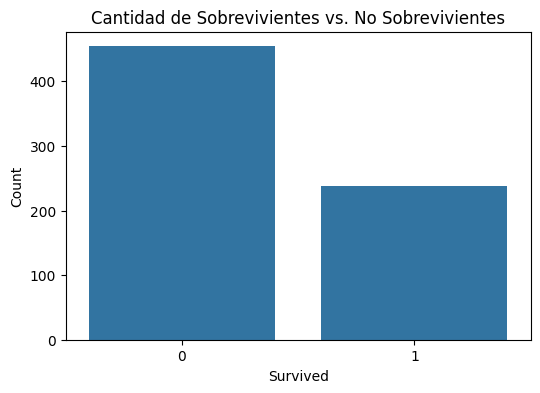

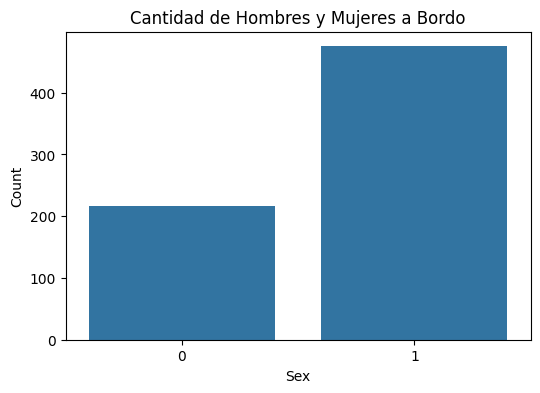

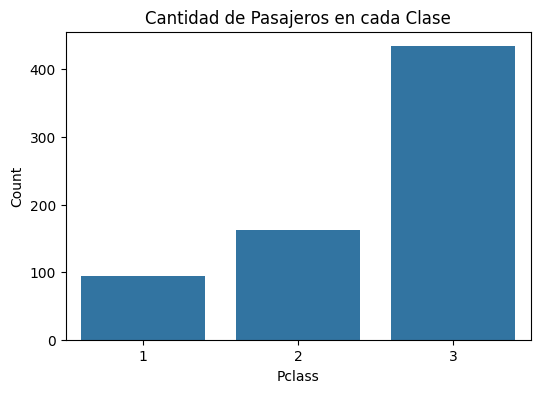

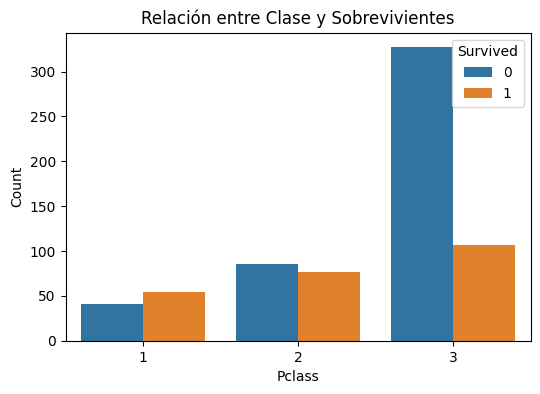

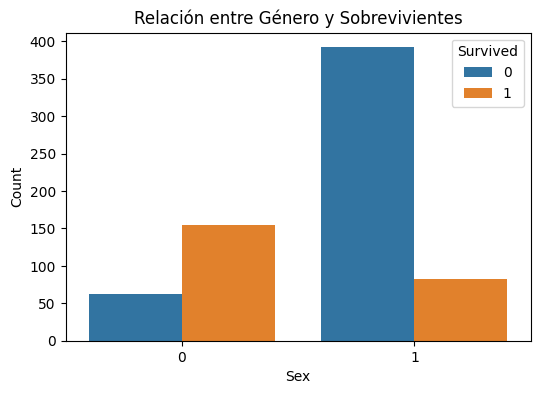

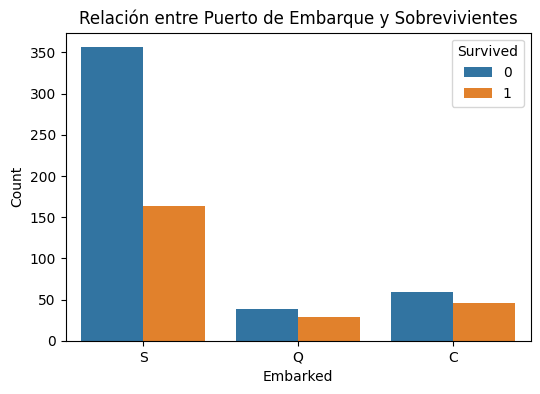

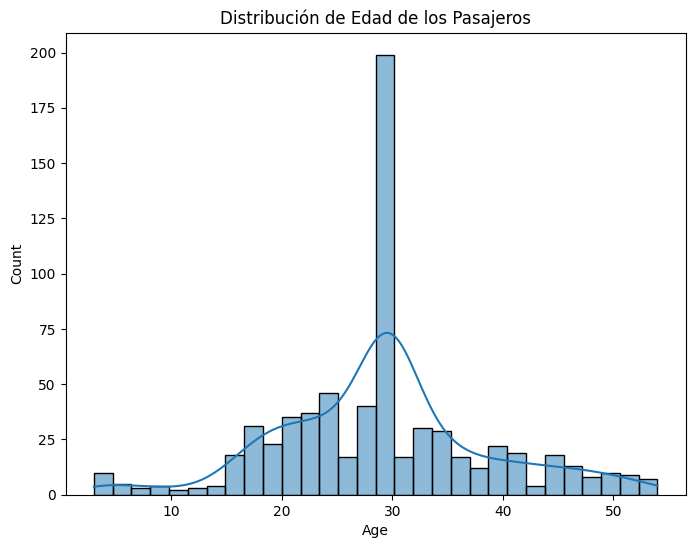

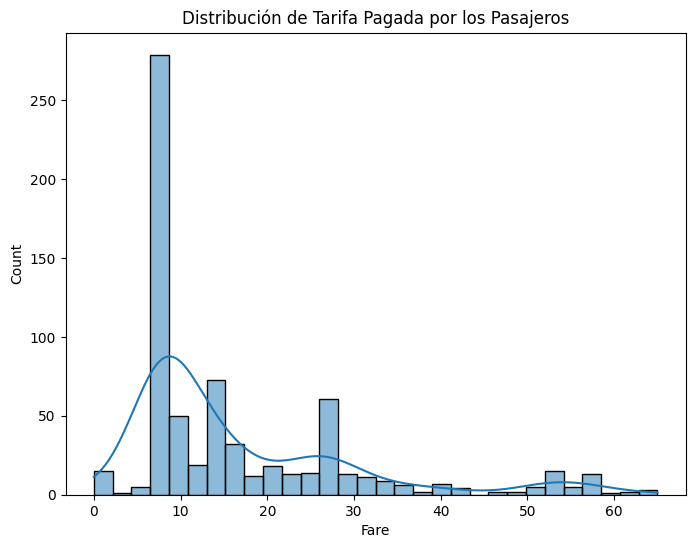

In [ ]:
# Gráfico de barras para contar la cantidad de sobrevivientes y no sobrevivientes
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic_so_c)
plt.title("Cantidad de Sobrevivientes vs. No Sobrevivientes")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

# Gráfico de barras para contar la cantidad de hombres y mujeres a bordo
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=titanic_so_c)
plt.title("Cantidad de Hombres y Mujeres a Bordo")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

# Gráfico de barras para contar la cantidad de pasajeros en cada clase
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=titanic_so_c)
plt.title("Cantidad de Pasajeros en cada Clase")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.show()

# Gráfico de barras apiladas para la relación entre Pclass y Survived
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=titanic_so_c)
plt.title("Relación entre Clase y Sobrevivientes")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(title='Survived', loc='upper right')
plt.show()

# Gráfico de barras apiladas para la relación entre Sex y Survived
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=titanic_so_c)
plt.title("Relación entre Género y Sobrevivientes")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title='Survived', loc='upper right')
plt.show()

# Gráfico de barras apiladas para la relación entre Embarked y Survived
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', hue='Survived', data=titanic_so)
plt.title("Relación entre Puerto de Embarque y Sobrevivientes")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.legend(title='Survived', loc='upper right')
plt.show()

# Gráfico de distribución de la edad de los pasajeros
plt.figure(figsize=(8, 6))
sns.histplot(x='Age', data=titanic_so_c, bins=30, kde=True)
plt.title("Distribución de Edad de los Pasajeros")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Gráfico de distribución de la tarifa pagada por los pasajeros
plt.figure(figsize=(8, 6))
sns.histplot(x='Fare', data=titanic_so_c, bins=30, kde=True)
plt.title("Distribución de Tarifa Pagada por los Pasajeros")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

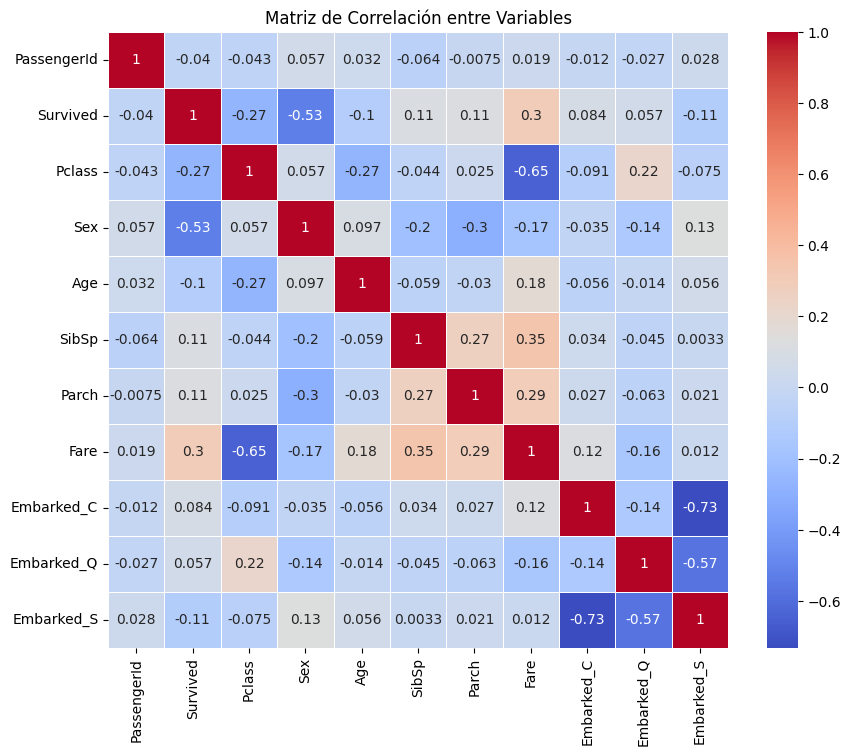

In [ ]:
correlation_matrix = titanic_so_c.corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()

# **PREDICCION**

In [ ]:
# Separar en subconjuntos de entrenamiento y de prueba.
X = titanic_so_c.drop(columns=['Survived'])
y = titanic_so_c['Survived']

# Dividir el conjunto de datos en subconjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los subconjuntos de entrenamiento y prueba
print("Dimensiones del subconjunto de entrenamiento (X_train):", X_train.shape)
print("Dimensiones del subconjunto de prueba (X_test):", X_test.shape)
print("Dimensiones del subconjunto de entrenamiento (y_train):", y_train.shape)
print("Dimensiones del subconjunto de prueba (y_test):", y_test.shape)

Dimensiones del subconjunto de entrenamiento (X_train): (553, 10)
Dimensiones del subconjunto de prueba (X_test): (139, 10)
Dimensiones del subconjunto de entrenamiento (y_train): (553,)
Dimensiones del subconjunto de prueba (y_test): (139,)


In [ ]:
#Entrenamos y mostramos resultados.
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = logreg_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy del modelo de regresión logística:", accuracy)

# Mostrar el reporte de clasificación y la matriz de confusión
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Accuracy del modelo de regresión logística: 0.7841726618705036

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        91
           1       0.70      0.65      0.67        48

    accuracy                           0.78       139
   macro avg       0.76      0.75      0.76       139
weighted avg       0.78      0.78      0.78       139


Matriz de Confusión:
[[78 13]
 [17 31]]


Conclusiones:

Considerando estos resultados, podemos decir que el modelo de regresión tiene un rendimiento "decente" pero puede haber margen de mejora (Estamos por debajo del 80%). Seguramente investigando, podamos encontrar modelos mas efectivos.

Las columnas eliminadas no tienen impacto en la predicción y por el valor obtenido entendemos que las desiciones tomadas para completar laas columnas arriba mencionadas fueron acertadas.

